<a href="https://colab.research.google.com/github/nilabja10201992/Cryptocurrency-Price-Prediction/blob/master/bitcoinsmalltopredict10daysinfuture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9,la;q=0.8,hi;q=0.7,fr;q=0.6" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-datasets/1346/330249/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1557061319&Signature=OseOZsGsnuZjlcGwbuL3BHuc7oTX7S5qfjL7%2BIKfaiESEfetKDfJlu9EhhEu3Cy0aAf%2BOPSlJEpr2g7JYG%2BIwfdtqseahPNVuyhVU14BlknhXTuHblAm%2BY5VJSsKsZm6YDns2vVG6XudXN90EDIMx43ALAY%2ByfTyXxQva7yHUeE0kaoQmnnFdqo1KUHNpJ6c5U5ijO9ZLUUW1pg7xrFDvx3wqOX6z7X2kB%2BIXeZsIltYDtXRaoCG3kfG3lsNZiuY4yHZMhAm1FujhRwddWrFJe88mQZy1tFKh15o%2FCxBFwBwVaoxVEtiQJ3syNTAHyrgYHzY8FxVfulYz6gPCVIzow%3D%3D" -O "coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip" -c

--2019-05-02 13:03:14--  https://storage.googleapis.com/kaggle-datasets/1346/330249/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1557061319&Signature=OseOZsGsnuZjlcGwbuL3BHuc7oTX7S5qfjL7%2BIKfaiESEfetKDfJlu9EhhEu3Cy0aAf%2BOPSlJEpr2g7JYG%2BIwfdtqseahPNVuyhVU14BlknhXTuHblAm%2BY5VJSsKsZm6YDns2vVG6XudXN90EDIMx43ALAY%2ByfTyXxQva7yHUeE0kaoQmnnFdqo1KUHNpJ6c5U5ijO9ZLUUW1pg7xrFDvx3wqOX6z7X2kB%2BIXeZsIltYDtXRaoCG3kfG3lsNZiuY4yHZMhAm1FujhRwddWrFJe88mQZy1tFKh15o%2FCxBFwBwVaoxVEtiQJ3syNTAHyrgYHzY8FxVfulYz6gPCVIzow%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52300764 (50M) [application/zip]
Saving to: ‘coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip’

coinbaseUSD_1-min_d 100%[===================>]  49.8

In [0]:
!ls

coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip  sample_data


In [0]:
!unzip coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip

Archive:  coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip
  inflating: coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv  


In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Library for Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, CuDNNLSTM, Dropout, CuDNNGRU, Bidirectional
from keras.optimizers import SGD
import math
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [0]:
def mean_absolute_scaled_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    dem = 0
    num = 0
    for i in range(n-1):
        dem += abs(y_true[i+1] - y_true[i])
    for i in range(n):
        num = abs(y_pred[i] - y_true[i])
        num = np.squeeze(num)
        res += num/dem
    res = np.squeeze(res)
    #print(num, dem, res)
    return res/n

In [0]:
def systematic_mean_absolute_percentage_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    for i in range(n):
        num = np.abs(y_pred[i] - y_true[i])
        dem = (np.abs(y_true[i]) + np.abs(y_pred[i]))/2
        res += num/dem
    res = np.squeeze(res)
    return 100*(res/n)

In [0]:
coinbase = pd.read_csv("coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")
coinbase.describe()


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.099760e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06
mean,1.483899e+09,3.246403e+03,3.247829e+03,3.244856e+03,3.246403e+03,7.849139e+00,3.600157e+04,3.246341e+03
std,3.638214e+07,3.799154e+03,3.801394e+03,3.796761e+03,3.799150e+03,1.873222e+01,1.401879e+05,3.799078e+03
min,1.417412e+09,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,2.641700e-06,6.000000e-02
25%,1.452410e+09,4.195800e+02,4.196400e+02,4.195000e+02,4.195700e+02,9.024000e-01,6.440031e+02,4.195645e+02
50%,1.483906e+09,1.014580e+03,1.014890e+03,1.014150e+03,1.014530e+03,2.692900e+00,3.695642e+03,1.014512e+03
75%,1.515402e+09,6.322630e+03,6.324010e+03,6.321090e+03,6.322670e+03,7.600965e+00,1.972392e+04,6.322550e+03
max,1.546899e+09,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.563267e+03,1.997076e+07,1.989199e+04


In [0]:
a = coinbase["Close"][800000:].fillna(method="backfill")

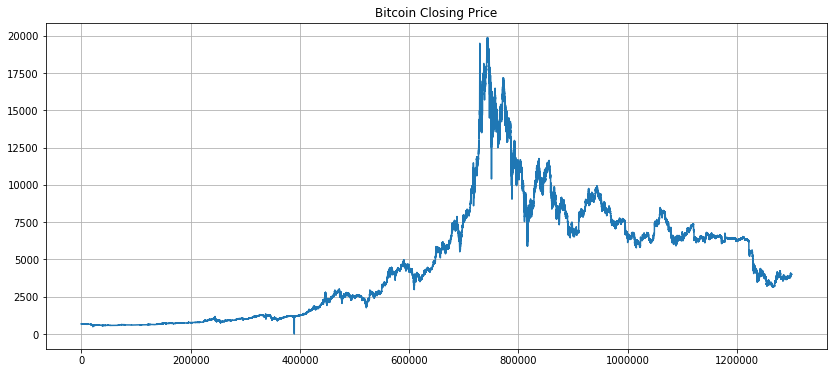

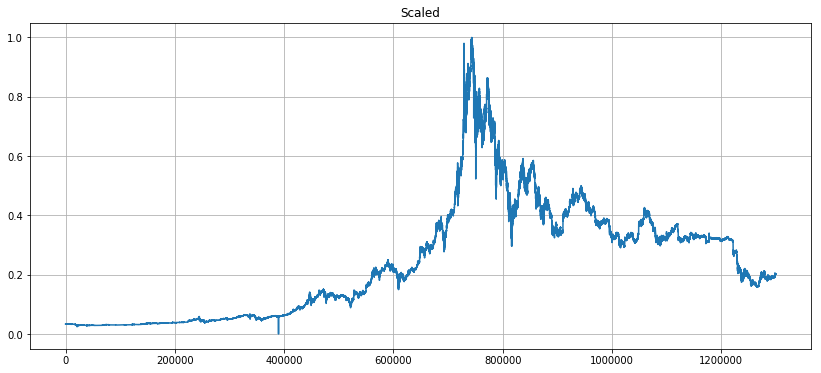

In [0]:
close_price = np.array(a).reshape(-1,1)
plt.figure(figsize=(14,6))
plt.title("Bitcoin Closing Price")
plt.grid()
plt.plot(close_price)

sc = MinMaxScaler()
close_priceSC = sc.fit_transform(close_price)
plt.figure(figsize=(14,6))
plt.title("Scaled")
plt.grid()
plt.plot(close_priceSC)

In [0]:
timestep = 100
X = []
y = []
for i in range(timestep, len(close_priceSC)-10):
    X.append(close_priceSC[i-timestep:i, 0])
    y.append(close_priceSC[i:i+10,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

(1299650, 100) (1299650, 10)


In [0]:
X_train = X[:1000000,:]
X_test = X[1000000:,:]

y_train = y[:1000000]
y_test = y[1000000:]


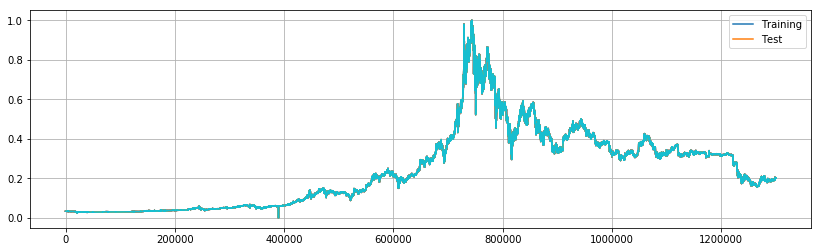

In [0]:
plt.figure(figsize=(14,4))
plt.plot(range(1000000),y_train)
plt.plot(range(1000000, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.grid()


In [0]:
X_train = X_train.reshape(-1, timestep,1)
X_test = X_test.reshape(-1,timestep,1)

In [0]:
%%time
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(CuDNNLSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(CuDNNLSTM(units=64, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(CuDNNLSTM(units=128, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(CuDNNLSTM(units=256))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=10))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_absolute_error')
# Fitting to the training set
regressor.fit(X_train, y_train, epochs=5, batch_size=2048)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1000000/1000000 [==============================] - 156s 156us/step - loss: 0.0231
Epoch 2/5
1000000/1000000 [==============================] - 157s 157us/step - loss: 0.0126
Epoch 3/5
1000000/1000000 [==============================] - 157s 157us/step - loss: 0.0109
Epoch 4/5
1000000/1000000 [==============================] - 157s 157us/step - loss: 0.0103
Epoch 5/5
1000000/1000000 [==============================] - 156s 156us/step - loss: 0.0101
CPU times: user 6min 45s, sys: 3min 14s, total: 10min
Wall time: 13min 5s


In [0]:
%%time
y_pred = regressor.predict(X_test)

CPU times: user 1min 20s, sys: 3.94 s, total: 1min 24s
Wall time: 1min 15s


In [0]:
for i in range(10):
  print("{0}th day\nMean absolute error {1}\nSystematic mean absolute percentage error {2} \nMean_absolute_scaled_error {3}\nMean square error {4}".format(i, mean_absolute_error(y_test, y_pred),systematic_mean_absolute_percentage_error(y_test[:,i], y_pred[:,i]), mean_absolute_scaled_error(y_test[:,i], y_pred[:,i]), mean_squared_error(y_test[:,i], y_pred[:,i])))

0th day
Mean absolute error 0.0036170139753446675
Systematic mean absolute percentage error 1.1645067728428313 
Mean_absolute_scaled_error 0.0001133484172238936
Mean square error 1.4600866858529707e-05
1th day
Mean absolute error 0.0036170139753446675
Systematic mean absolute percentage error 1.1928934236439106 
Mean_absolute_scaled_error 0.00011600451835385272
Mean square error 1.5291814301343047e-05
2th day
Mean absolute error 0.0036170139753446675
Systematic mean absolute percentage error 1.1615542179737737 
Mean_absolute_scaled_error 0.00011305581435745654
Mean square error 1.4621940143798695e-05
3th day
Mean absolute error 0.0036170139753446675
Systematic mean absolute percentage error 1.2430836411278183 
Mean_absolute_scaled_error 0.00012077875269880299
Mean square error 1.6598192716372394e-05
4th day
Mean absolute error 0.0036170139753446675
Systematic mean absolute percentage error 1.2140105242622958 
Mean_absolute_scaled_error 0.00011809090117343934
Mean square error 1.5977075

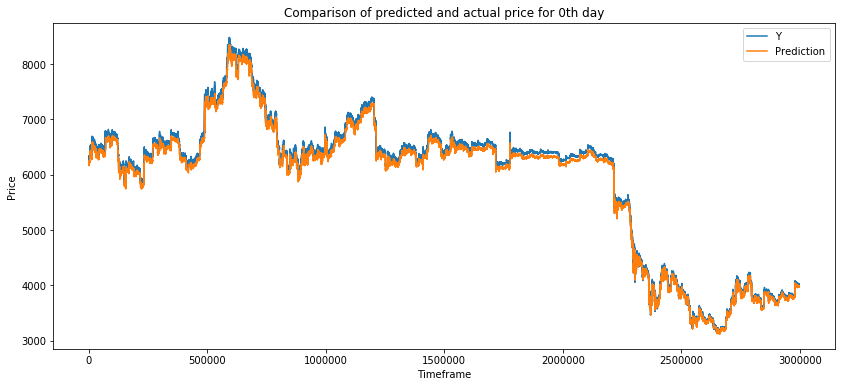

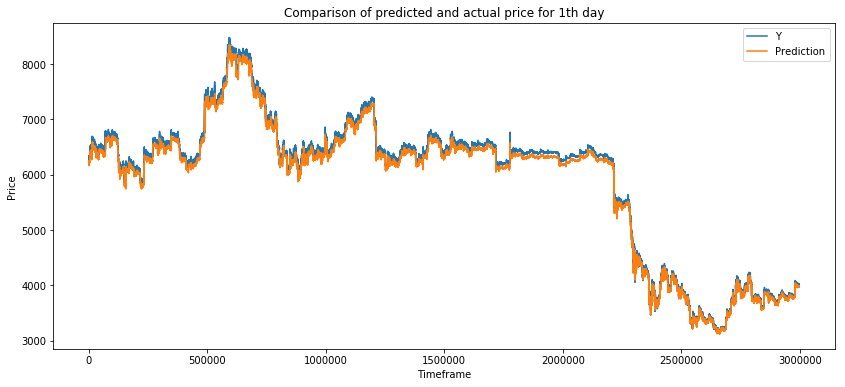

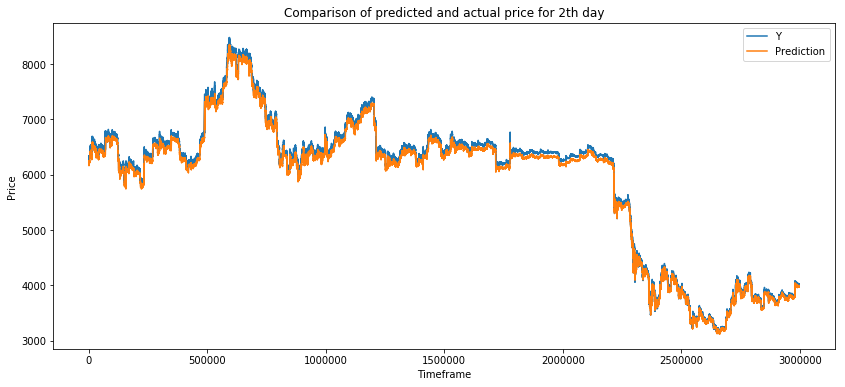

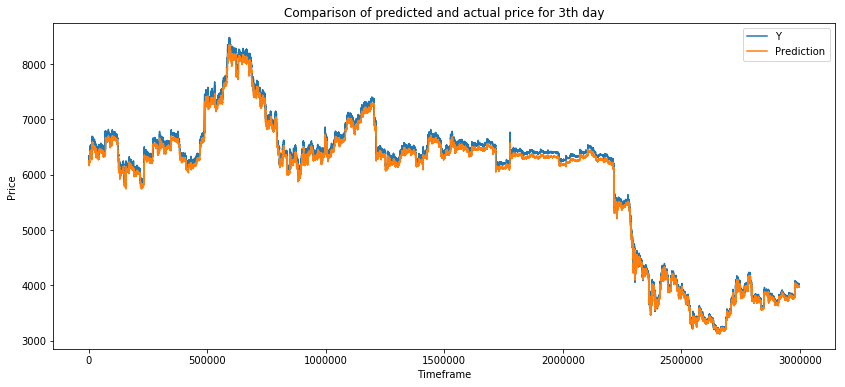

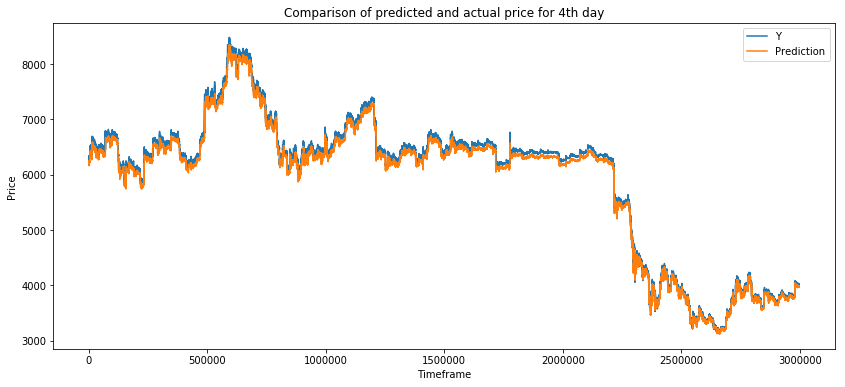

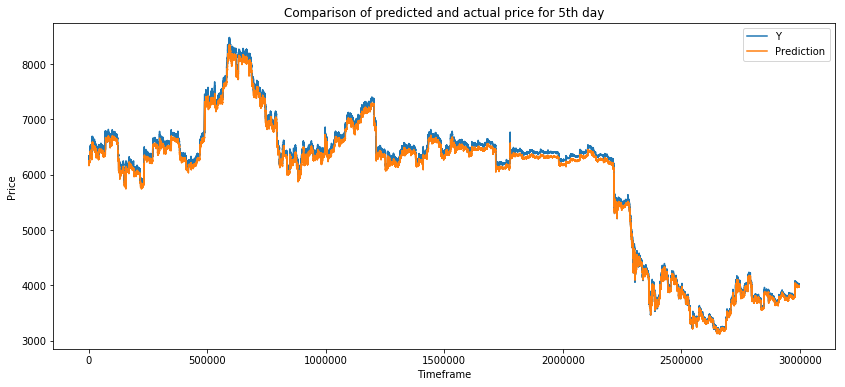

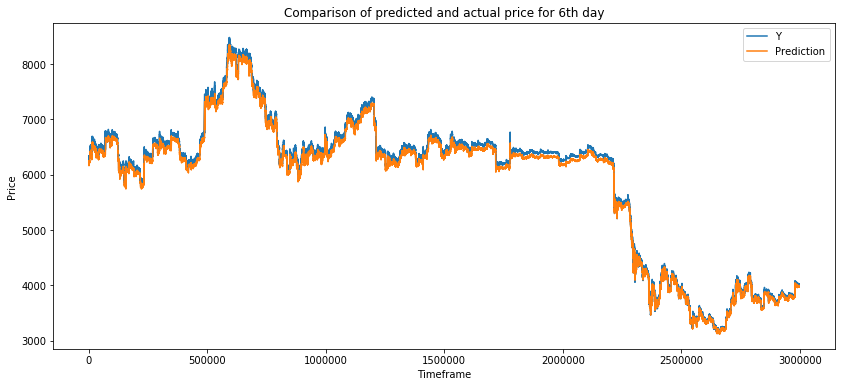

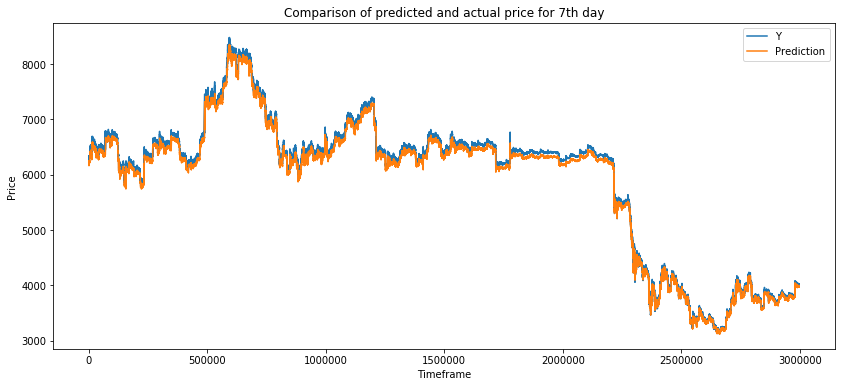

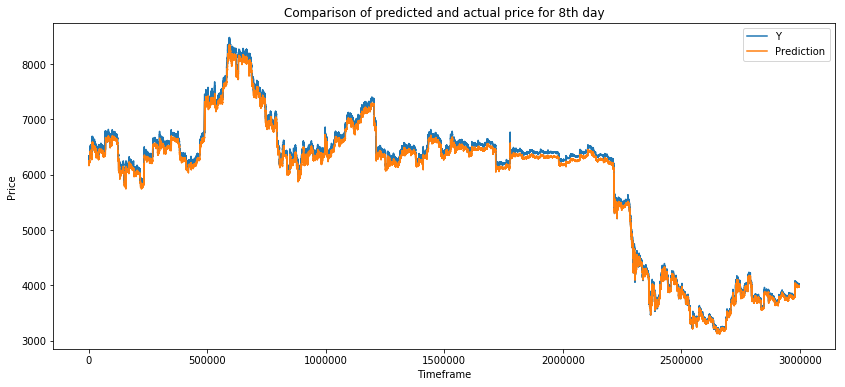

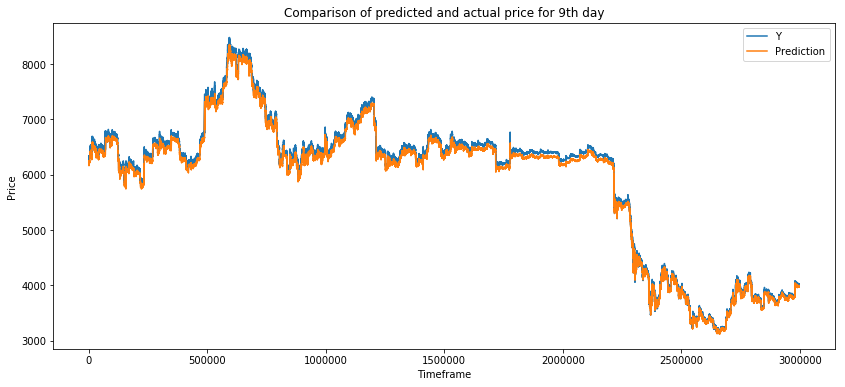

In [0]:
for i in range(10):
  plt.figure(figsize=(14,6))
  plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
  plt.plot(sc.inverse_transform(y_pred.reshape(-1,1)))
  plt.title("Comparison of predicted and actual price for {0}th day".format(i))
  plt.legend(["Y", "Prediction"])
  plt.xlabel("Timeframe")
  plt.ylabel("Price")
  plt.pause(0.1)